# Question 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

The following function iterates the equation $z_{i+1} = z_{i}^{2} + c$ for $z_{0}=0$ and $c=x+iy$.

In [2]:
def Z(x, y, npoints):
    c = x + y*1j
    z = 0
    for i in range(npoints):
        z = z**2 + c
        yield z

This creates a generator object, which can be used to iterate through each $z_{i}$ for $i\geq1$. For example:

In [3]:
Z(1,0,5)

<generator object Z at 0x0000000018644DC8>

In [4]:
list(Z(1,1,5))

[(1+1j), (1+3j), (-7+7j), (1-97j), (-9407-193j)]

We can apply this function to a region in the complex plane.

In [5]:
n = 10 # number of iterations to compute

In [6]:
x = np.linspace(-3, 2, 1000)
y = np.linspace(-2, 2, 1000)
xv, yv = np.meshgrid(x, y)
vals = np.array(list(Z(xv, yv, n)))

We can also make a 3D plot of $|z_{n}|$ for a certain $n$. Note that due to the size of the absolute values, we must plot the logarithm of each value.

In [7]:
zv = np.log10(abs(vals[n-1]))

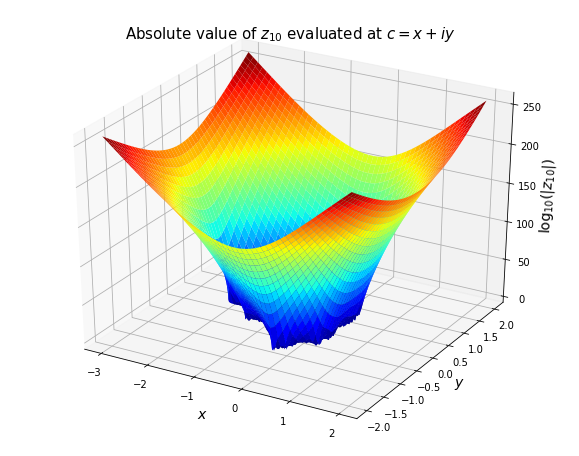

In [8]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('$x$', fontsize = 14)
ax.set_ylabel('$y$', fontsize = 14)
ax.set_zlabel('$\log_{10}(|z_{%d}|)$'%n, fontsize = 14)
ax.set_title('Absolute value of $z_{%d}$ evaluated at $c=x+iy$'%n, fontsize = 15)
surf = ax.plot_surface(xv, yv, zv, cmap = 'jet')
plt.show()

We wish to determine which points will diverge. To do so, we need to choose some criterion which tells us if a point is diverging. I claim that the sequence $\{|z_i|\}$ will diverge at some point $c=x+iy$, $c\neq0$ if there exists a $z_i$ such that $|z_i|>|c|+1$. A proof of this is below.

Suppose $|z_i|>|c|+1$ for some $z_i$. We will show that $|z_{j+1}|>|z_j|+|c|^2$ for all $j\geq i$, and hence the sequence diverges to infinity. Consider the following: 

$$|z_i|^2-|z_i| = |z_i|(|z_i|-1) > (|c|+1)|c| = |c|^2+|c|$$
Hence, $$|z_i|^2-|c| > |z_i| + |c|^2$$
Moreover, $$|z_{i+1}| = |z_i^2+c| \geq ||z_i|^2-|c|| \geq |z_i|^2-|c|$$
Combining these inequalities yields $$|z_{i+1} |> |z_i| + |c|^2$$

Since we also consequently have $|z_{i+1}| > |c|+1$, then this last inequality holds true for all $j \geq i$, as desired.

Now, to determine which points we know are diverging at some iteration $i$, we can simply check whether $|z_i|>|c|+1$.

In [9]:
def isDiverging(x, y, z):
    c = x + y*1j
    return (abs(z) > abs(c) + 1)

This function can then be used to select the diverging/bounded values indivdually.

In [10]:
mask = isDiverging(xv, yv, vals[n-1])
diverging = np.log10(abs(np.where(mask, vals[n-1], np.nan)))
bounded = np.log10(abs(np.where(~mask, vals[n-1], np.nan)))

We can individually plot the values which we know are diverging at some iteration.

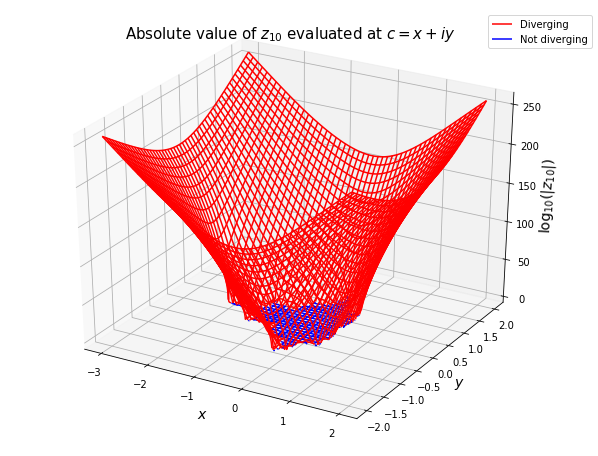

In [11]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('$x$', fontsize = 14)
ax.set_ylabel('$y$', fontsize = 14)
ax.set_zlabel('$\log_{10}(|z_{%d}|)$'%n, fontsize = 14)
ax.set_title('Absolute value of $z_{%d}$ evaluated at $c=x+iy$'%n, fontsize = 15)
surf1 = ax.plot_wireframe(xv, yv, diverging, color = 'red', label = 'Diverging')
surf2 = ax.plot_wireframe(xv, yv, bounded, color = 'blue', label = 'Not diverging')
legend = ax.legend(bbox_to_anchor = (1.05, 1))
plt.show()

We can also plot each value by the iteration at which it begins to diverge. 
__Note: by this I mean the iteration at which the criterion $|z_i|>|c|+1$ is met.__

In [12]:
masks = []
for i in range(1, n): # iterate through each z_i
    mask = isDiverging(xv, yv, vals[i])
    masks.append(mask & ~np.any(masks, 0)) # create a mask consisting only of values that are just beginning to diverge
masks.append(~np.any(masks, 0)) # create a mask for the values that are still not diverging
masks = np.array(masks)
masked_vals = np.where(masks, vals[n-1], np.nan)
zv = np.log10(abs(masked_vals))

I've changed the initial viewing angle for this next plot so that the different layers can be more easily distinguished.

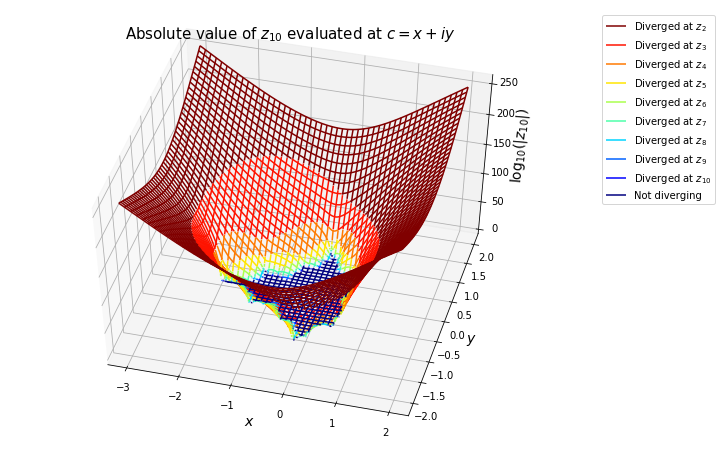

In [13]:
cmap = plt.get_cmap('jet')
colours = cmap(np.linspace(1, 0, n)) # get n evenly spaced colours from a colour map
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('$x$', fontsize = 14)
ax.set_ylabel('$y$', fontsize = 14)
ax.set_zlabel('$\log_{10}(|z_{%d}|)$'%n, fontsize = 14)
ax.set_title('Absolute value of $z_{%d}$ evaluated at $c=x+iy$'%n, fontsize = 15)
ax.view_init(elev = 50, azim = -75)
surfs = [ax.plot_wireframe(xv, yv, zv[j], color = colours[j], label = 'Diverged at $z_{%d}$'%(j+2)) for j in range(n-1)]
surfs.append(ax.plot_wireframe(xv, yv, zv[-1], color = colours[-1], label = 'Not diverging'))
legend = ax.legend(bbox_to_anchor = (1.05, 1), loc = 2)
plt.show()

We can also zoom into a region of this graph and redo the plot.

In [14]:
x = np.linspace(-0.5, 0.5, 1000)
y = np.linspace(0.5, 1.5, 1000)
xv, yv = np.meshgrid(x, y)
vals = np.array(list(Z(xv, yv, n)))

In [15]:
masks = []
for i in range(1, n):
    mask = isDiverging(xv, yv, vals[i])
    masks.append(mask & ~np.any(masks, 0))
masks.append(~np.any(masks, 0))
masks = np.array(masks)
masked_vals = np.where(masks, vals[n-1], np.nan)
zv = np.log10(abs(masked_vals))

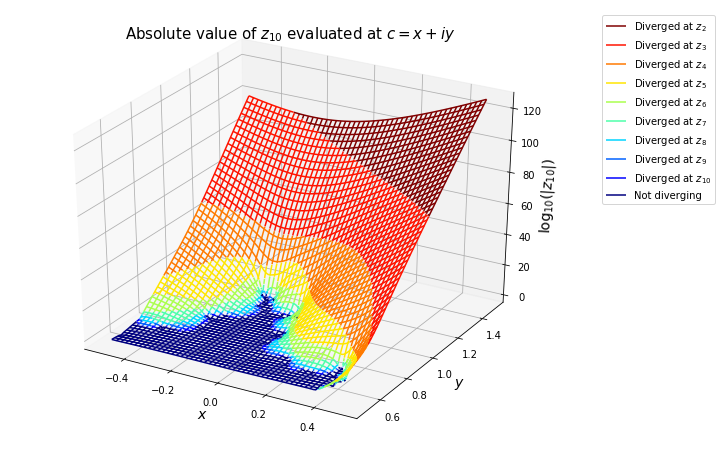

In [16]:
cmap = plt.get_cmap('jet')
colours = cmap(np.linspace(1, 0, n)) # get n evenly spaced colours from a colour map
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('$x$', fontsize = 14)
ax.set_ylabel('$y$', fontsize = 14)
ax.set_zlabel('$\log_{10}(|z_{%d}|)$'%n, fontsize = 14)
ax.set_title('Absolute value of $z_{%d}$ evaluated at $c=x+iy$'%n, fontsize = 15)
surfs = [ax.plot_wireframe(xv, yv, zv[j], color = colours[j], label = 'Diverged at $z_{%d}$'%(j+2)) for j in range(n-1)]
surfs.append(ax.plot_wireframe(xv, yv, zv[-1], color = colours[-1], label = 'Not diverging'))
legend = ax.legend(bbox_to_anchor = (1.05, 1), loc = 2)
plt.show()

I realized in retrospect that this question was probably asking when each value becomes np.nan. A plot of this is below.

In [17]:
n = 100
x = np.linspace(-2, 2, 1000)
y = np.linspace(-2, 2, 1000)
xv, yv = np.meshgrid(x, y)
vals = np.array(list(Z(xv, yv, n)))

c:\python27\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in square
  """
c:\python27\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in square
  """


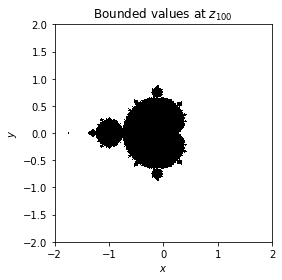

In [18]:
zv = np.isnan(vals[n-1])
plt.imshow(zv, cmap = 'gray', extent = [-2,2,-2,2])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Bounded values at $z_{%d}$'%n)
plt.show()

It is fairly simple to plot the iteration at which each value becomes np.nan.

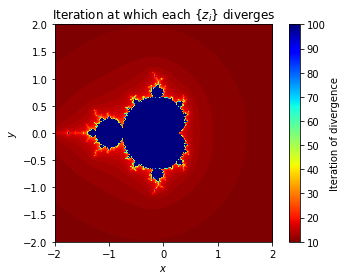

In [19]:
zv = np.zeros(vals[0].shape)
for val in vals:
    zv += ~np.isnan(val)
plt.imshow(zv, cmap = 'jet_r', extent = [-2,2,-2,2])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Iteration at which each $\{z_i\}$ diverges')
plt.colorbar(label = 'Iteration of divergence')
plt.show()

We can zoom into a region of this graph.

In [20]:
x = np.linspace(-0.35, 0.15, 1000)
y = np.linspace(-0.75, -1.25, 1000)
xv, yv = np.meshgrid(x, y)
vals = np.array(list(Z(xv, yv, n)))

c:\python27\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in square
  """
c:\python27\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in square
  """


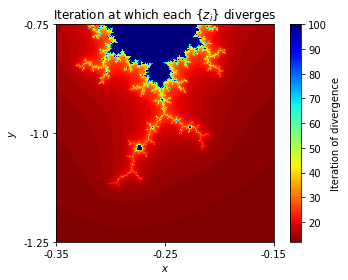

In [21]:
zv = np.zeros(vals[0].shape)
for val in vals:
    zv += ~np.isnan(val)
plt.imshow(zv, cmap = 'jet_r')
plt.xticks(np.linspace(0,1000,3), [-0.35, -0.25, -0.15])
plt.yticks(np.linspace(0,1000,3), [-0.75, -1.0, -1.25])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Iteration at which each $\{z_i\}$ diverges')
plt.colorbar(label = 'Iteration of divergence')
plt.show()